In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

In [8]:
import pickle

# Replace 'your_file.pkl' with the actual path to your .pkl file
file_path = 'map2.pkl'

# Open the file in binary mode
with open(file_path, 'rb') as file:
    # Load the object from the pickle file
    data = pickle.load(file)

# Now 'data' contains the object stored in the .pkl file
print(data)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.91670552e+00  1.03488356e+00  8.86351887e+01  1.09999999e-01]
 [ 1.05048929e+01 -5.47524404e+00  8.83801887e+01  7.00000003e-02]
 ...
 [-5.90442654e+00  3.80054067e-01  8.87737047e+01  9.00000036e-02]
 [-2.53963580e+00 -4.47332671e+00  8.89137047e+01  7.00000003e-02]
 [-2.49501699e+00 -5.79681989e+00  8.89537046e+01  9.00000036e-02]]


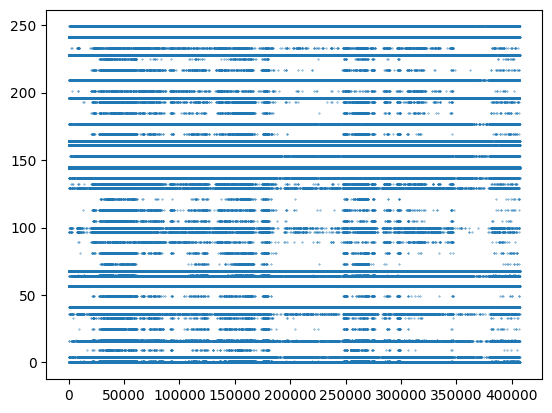

38.48764806887464

In [19]:
data[:,3]
threshold = np.where((data[:,3]>0.3) & (data[:,3]<25))
filter = data[threshold]
intensity = filter[:,3]
# norm_intensity = intensity / (np.amax(intensity) - np.amin(intensity))

# norm_intensity = np.log10(intensity) +2

norm_intensity = np.amax(intensity)/2  *intensity*  255 / (np.amax(intensity) - np.amin(intensity))

    # map value range to 8bit
img_int = norm_intensity.astype(np.uint8)

# norm_intensity = intensity / (np.amax(intensity) - np.amin(intensity))
colors = plt.cm.viridis(img_int/255)[:,:3]

# plt.scatter(np.arange(len(intensity)), intensity)
plt.scatter(np.arange(len(img_int)), img_int**2, s=0.1)
plt.show()
np.amin(norm_intensity)


In [20]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(filter[:,0:3])
pcd.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([pcd])